<a href="https://colab.research.google.com/github/skrofman/Applied-Machine-Learning/blob/master/DATA_310_Lecture_19_Spring_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA 310  Lecture 19 - Spring 2021

In [30]:
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold

In [3]:
regSVM = LinearSVR(epsilon=1.0, C=1e-8, tol=1e-8, max_iter=1000000)

In [4]:

kf = KFold(n_splits=10, random_state=2021, shuffle=True)

In [5]:
data = load_boston()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
y = data.target

In [6]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
# we want to use all the features (we want a multivariate model)
X = df.values

In [8]:
kf = KFold(n_splits=5,shuffle=True,random_state=1234)

In [23]:
model = LinearRegression()
scale = StandardScaler()

In [24]:
pipe = Pipeline([('Scale',scale),('Regressor',model)])

In [25]:
def DoKFold(X,y,model):
  PE = []
  for idxtrain,idxtest in kf.split(X):
    Xtrain = X[idxtrain,:]
    Xtest = X[idxtest,:]
    ytrain = y[idxtrain]
    ytest = y[idxtest]
    pipe.fit(Xtrain,ytrain)
    yhat = pipe.predict(Xtest)
    PE.append(MAE(ytest,yhat))
  return 1000*np.mean(PE)

In [26]:
DoKFold(X,y,model)

3476.765677503914

In [27]:
model = LinearSVR(epsilon=4.0,C=5, tol=1e-8,max_iter=1000000)
pipe = Pipeline([('Scale',scale),('Regressor',model)])

In [28]:
DoKFold(X,y,model)

3393.49944845623

In [31]:
model = RandomForestRegressor(n_estimators=200,max_depth=3)
pipe = Pipeline([('Scale',scale),('Regressor',model)])

In [32]:
DoKFold(X,y,model)

2916.551259892511

##<font color='navy'> Support Vector Regression </font>

Support Vectors is a method used in Machine Learning for both regression and classification problmes. The main idea is to map the input features into a higher dimensional space and then, in that higher dimensional space, address the problem to solve. 

For regression, SVM consists of an algorithm that solves a quadratic optimization problem with constraints:

$$
\text{minimize}\frac{1}{2}\|w\|^2
$$

subject to 

$$\large{
y_i -wx_i - b\leq\epsilon\\
wx_i+b-y_i \leq \epsilon}
$$

which means

$$\large |y_i - (wx_i+b)|\leq\epsilon$$
Intuitively we have

<figure>
<center>
<img src='https://drive.google.com/uc?id=181CQwT0LE0UnbBspZyce_4sSr6Qbcx38' 
width='500px' />
<figcaption>Support Vector Regression</figcaption></center>
</figure>




SVR with slack variables consists of an algorithm that solves a quadratic optimization problem with constraints:

$$
\text{minimize}\frac{1}{2}\|w\|^2 + C\sum_{i=1}^{n}|\xi_i|
$$

subject to 

$$
|y_i - x_i\cdot w - b|\leq\epsilon + |\xi_i|
$$

where $x_i = (x_{i1},x_{i2},...x_{ip})$ represents the ith observation that has $p$ features and $w$ is the vector of the weights. We have $1\times p \cdot p\times 1 = 1\times 1$ The main idea is that the slack variables will accommodate points that are "close" to the epsilon margins and that may influence the influence the value of the weights. 

<font color='green'> This means that we have at least two different hyperparameters in this case such as $\epsilon$ and $C$.</font>


In [ ]:
regSVM = LinearSVR(epsilon=1.0, tol=1e-8,max_iter=1000000)

In [ ]:
from sklearn.model_selection import KFold # import KFold
kf = KFold(n_splits=5, random_state=2021,shuffle=True)

In [ ]:
data = datasets.load_boston()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
y = data.target

In [ ]:
scale = StandardScaler()

In [ ]:
xscaled = scale.fit_transform(df)

In [ ]:
y.shape

(506,)

First, let's try a hard SVR to the whole data

In [ ]:
regSVM = LinearSVR(epsilon=5.0, C=1, tol=1e-8,max_iter=1000000)

In [ ]:
regSVM.fit(xscaled,y)

LinearSVR(C=1, dual=True, epsilon=5.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000000,
          random_state=None, tol=1e-08, verbose=0)

In [ ]:
yhat = regSVM.predict(xscaled)

# MSE
np.mean((y-yhat)**2)

22.699880511175156

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
lm = LinearRegression()
lm.fit(xscaled,y)
yhat_lm = lm.predict(xscaled)
#MSE
np.mean((y-yhat_lm)**2)

21.894831181729206

We want an unbiased estimation of the MSE we implement a complete K-Fold cross-validation

In [ ]:
i = 0
PE = []
PE_train = []
# model = linear_model.LinearRegression()
model = LinearSVR(epsilon=5.0, C=1.0, tol=1e-8,max_iter=1000000)
for train_index, test_index in kf.split(df):
    X_train = df.values[train_index]
    X_train_scaled = scale.fit_transform(X_train)
    y_train = y[train_index]
    X_test = df.values[test_index]
    X_test_scaled = scale.transform(X_test)
    y_test = y[test_index]
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_train = model.predict(X_train_scaled)
    PE_train.append(MSE(y_train,y_pred_train))
    PE.append(MSE(y_test, y_pred))
    # print('RMSE from each fold:',np.sqrt(MSE(y_test, y_pred)))

print('The k-fold crossvalidated error rate on the train sets is: ' + str(np.mean(PE_train)))
print('The k-fold crossvalidated error rate on the test sets is: ' + str(np.mean(PE)))

The k-fold crossvalidated error rate on the train sets is: 22.676266628818617
The k-fold crossvalidated error rate on the test sets is: 24.988801617306088


In [ ]:
i = 0
PE = []
PE_train = []
model = LinearRegression()
#model = LinearSVR(epsilon=5.0, C=3.0, tol=1e-8,max_iter=1000000)
for train_index, test_index in kf.split(df):
    X_train = df.values[train_index]
    X_train_scaled = scale.fit_transform(X_train)
    y_train = y[train_index]
    X_test = df.values[test_index]
    X_test_scaled = scale.transform(X_test)
    y_test = y[test_index]
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_train = model.predict(X_train_scaled)
    PE_train.append(MSE(y_train,y_pred_train))
    PE.append(MSE(y_test, y_pred))
    # print('RMSE from each fold:',np.sqrt(MSE(y_test, y_pred)))

print('The k-fold crossvalidated error rate on the train sets is: ' + str(np.mean(PE_train)))
print('The k-fold crossvalidated error rate on the test sets is: ' + str(np.mean(PE)))

The k-fold crossvalidated error rate on the train sets is: 21.682602890671525
The k-fold crossvalidated error rate on the test sets is: 23.87328141047908


In [ ]:
i = 0
PE = []
regSVM = LinearSVR(epsilon=5.0,max_iter= 10000)
for train_index, test_index in kf.split(df):
    X_train = df.values[train_index]
    y_train = y[train_index]
    X_test = df.values[test_index]
    y_test = y[test_index]
    model = regSVM.fit(X_train, y_train)
    y_pred = regSVM.predict(X_test)
    PE.append(np.sqrt(MSE(y_test, y_pred)))
    # print('RMSE from each fold:',np.sqrt(MSE(y_test, y_pred)))

print('The k-fold crossvalidated prediction error is: ' + str(np.mean(PE)))

Make a cross-validated comparison between SVR, OLS, Lasso and RIDGE regression.

##<font color='navy'> Regression Trees</font>

<font color='green'> **Main Idea:** Things are different for subsets in the data. Nonlinear relationships may exist and we should be able to accommodate them.
</font>

\

**Example:** Predict the price of a car by using a (possibly nonlinear) combination of features such as wheelbase and horsepower.

<figure>
<center>
<img src='https://drive.google.com/uc?id=1yVm5Xa9WVZViJjaA9w35veKGGK3ggqGU' 
width='500px' />
<figcaption>Data for a Decision Tree</figcaption></center>
</figure>

And we can create a **regression tree**:

<figure>
<center>
<img src='https://drive.google.com/uc?id=1Pm0nKc2DCw7Cx4gSGX_fDPKCU2w5mmkM' 
width='400px' />
<figcaption>The actual Decision Tree</figcaption></center>
</figure>

<figure>
<center>
<img src='https://drive.google.com/uc?id=1WXNaLZMFe5vV2sE6NO6QgXUWQ10kSHjW' 
width='350px' />
<figcaption>Visual interpretation</figcaption></center>
</figure>

<font color="green">**Stopping Criteria:** Stop growing the tree when further splits gives less than some minimal amount of extra information or when we have less than 5% of the data in those nodes.</font>


1. Start with a single node containing all the points then calculate $m_c$ and $S.$ We have $$S:=\sum\limits_{C\in\text{leaves(T)}}\sum\limits_{i\in C}(y_i-m_c)^2$$ and $$m_c:=\frac{1}{n_c}\sum\limits_{i\in C}y_i.$$
2. If all the points in the node have the same value for all the independent variables, stop. Otherwise, search over all binary splits of all variables for the one which will reduce $S$ as much as possible. If the largest decrease in $S$ would be less than some threshold $\delta$, or one of the resulting nodes would contain less than $q$ points, stop. Otherwise take that split, creating two new nodes.
3. In each new node go back to Step 1.


##<font color='navy'> Example of Regression Tree in Python</font>

In this example we have one input feature and one dependent variable.

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

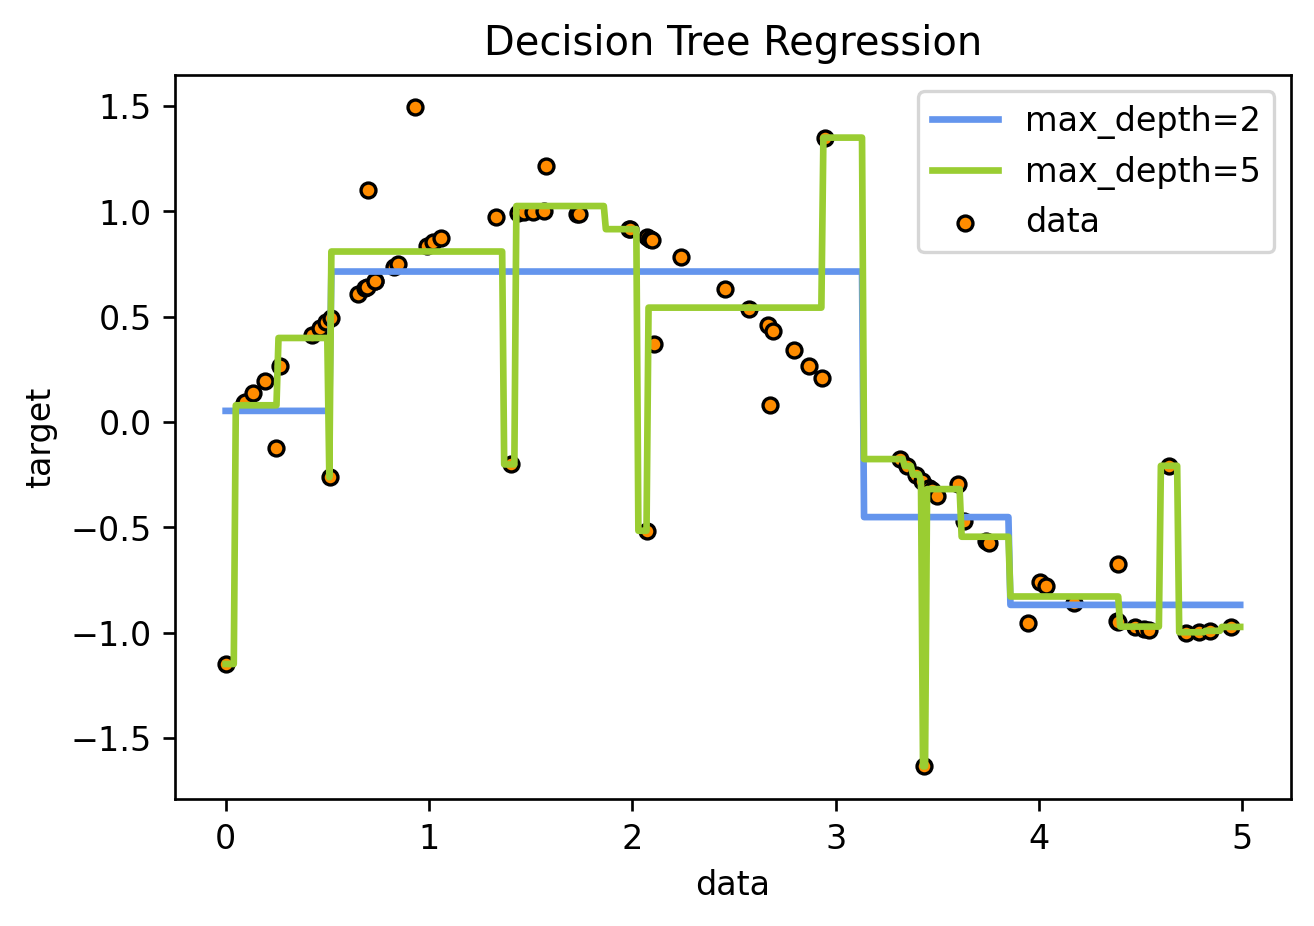

In [ ]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

##<font color="navy"> Ensemble Learning - Random Forests</font>

- Step 1: Pick a random set of points from your training set.

- Step 2: Build the regression tree.

- Step 3: Build thousands of trees, repeating 1 and 2.

- Step 4: For every unit of observation, take the average prediction across all trees.

<font color='green'>**Rationale**: more resilient to outliers, better for external validity. You can also provide information on how certain or uncertain you are about a result.
</font>

- Question: How many trees should we grow in the forest?
Answer: Don’t want your answer changing much. There is no good pre-determined number.

- “Convergence” -when adding another ten trees (or, whatever number) doesn’t matter to your results. Depends heavily on the structure and complication of your study.

Generally speaking, "let it grow" (Leo Breiman)

## <font color='navy'>Support Vector Regression with Slack Variables</font>

The next Python example is from the following Data Science paper:

https://towardsdatascience.com/an-introduction-to-support-vector-regression-svr-a3ebc1672c2 


The analysis is based on a complete version the Boston housing data set (attached).

In [ ]:

import matplotlib.pyplot as plt


In [ ]:

df = pd.read_csv("drive/MyDrive/Data Sets/Boston Housing Prices.csv")

In [ ]:
df.head()

,town,tract,longitude,latitude,crime,residential,industrial,river,nox,rooms,older,distance,highway,tax,ptratio,lstat,cmedv
0,Nahant,2011,-70.955002,42.255001,0.00632,18.0,2.31,no,0.538,6.575,65.199997,4.0900,1,296,15.300000,4.98,24.000000
1,Swampscott,2021,-70.949997,42.287498,0.02731,0.0,7.07,no,0.469,6.421,78.900002,4.9671,2,242,17.799999,9.14,21.600000
2,Swampscott,2022,-70.935997,42.283001,0.02729,0.0,7.07,no,0.469,7.185,61.099998,4.9671,2,242,17.799999,4.03,34.700001
3,Marblehead,2031,-70.928001,42.292999,0.03237,0.0,2.18,no,0.458,6.998,45.799999,6.0622,3,222,18.700001,2.94,33.400002
4,Marblehead,2032,-70.921997,42.298000,0.06905,0.0,2.18,no,0.458,7.147,54.200001,6.0622,3,222,18.700001,5.33,36.200001


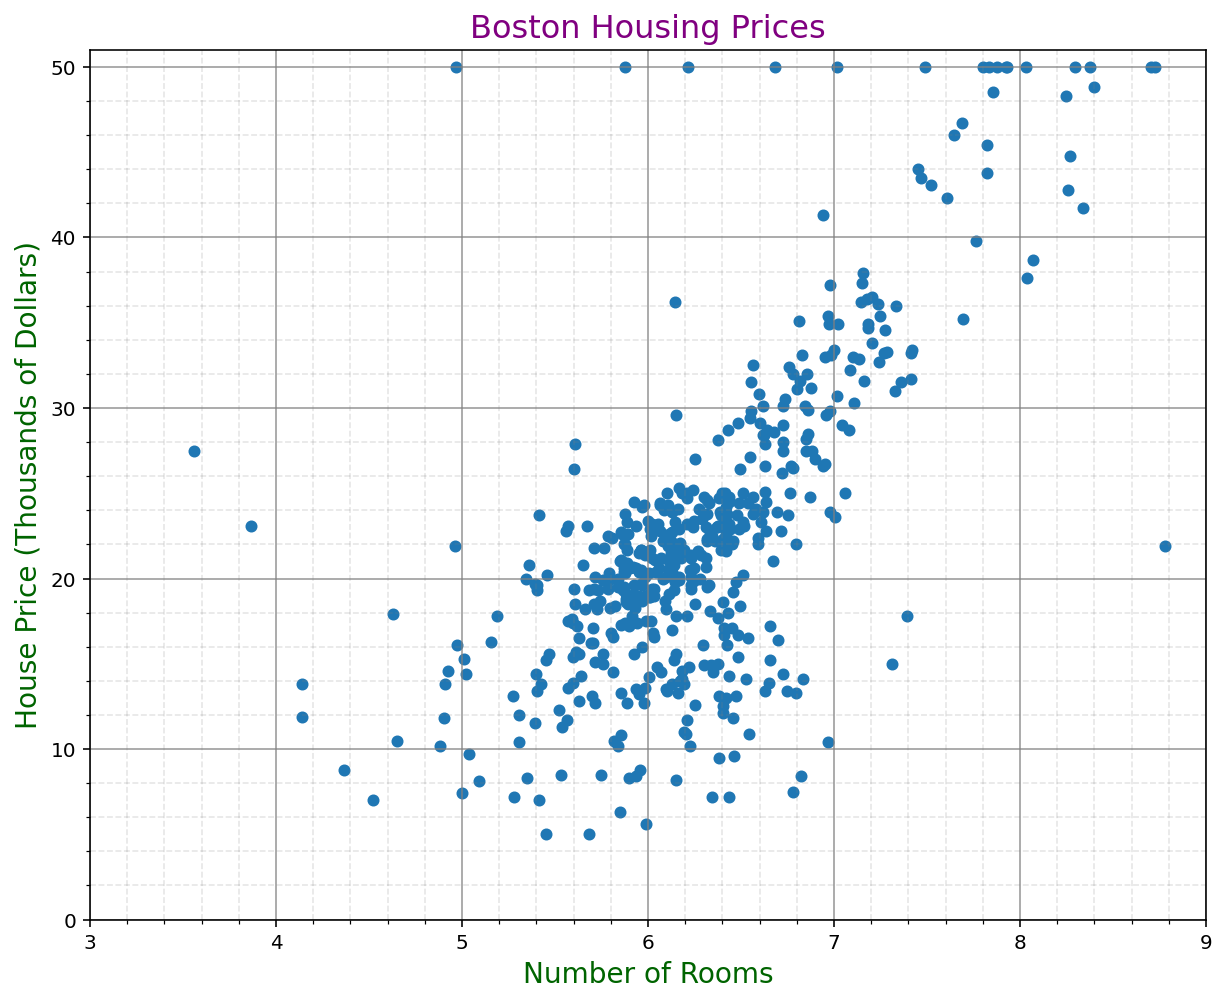

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlim(3, 9)
ax.set_ylim(0, 51)
ax.scatter(x=df['rooms'], y=df['cmedv'],s=25)
ax.set_xlabel('Number of Rooms',fontsize=14,color='darkgreen')
ax.set_ylabel('House Price (Thousands of Dollars)',fontsize=14,color='darkgreen')
ax.set_title('Boston Housing Prices',fontsize=16,color='purple')
ax.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.2)
ax.minorticks_on()
plt.show()

###<font color='deepskyblue'> Linear Regression </font>

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = np.array(df['rooms']).reshape(-1,1)
y = np.array(df['cmedv']).reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)

y_train = y_train.reshape(len(y_train),)
y_test = y_test.reshape(len(y_test),)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

$$
\text{MAE}:=\frac{1}{n}\sum_{i=1}^{n}|y_i-\hat{y}_i|
$$

Intercept: -37.049
Coefficient: 9.492
MAE = $4,079.99


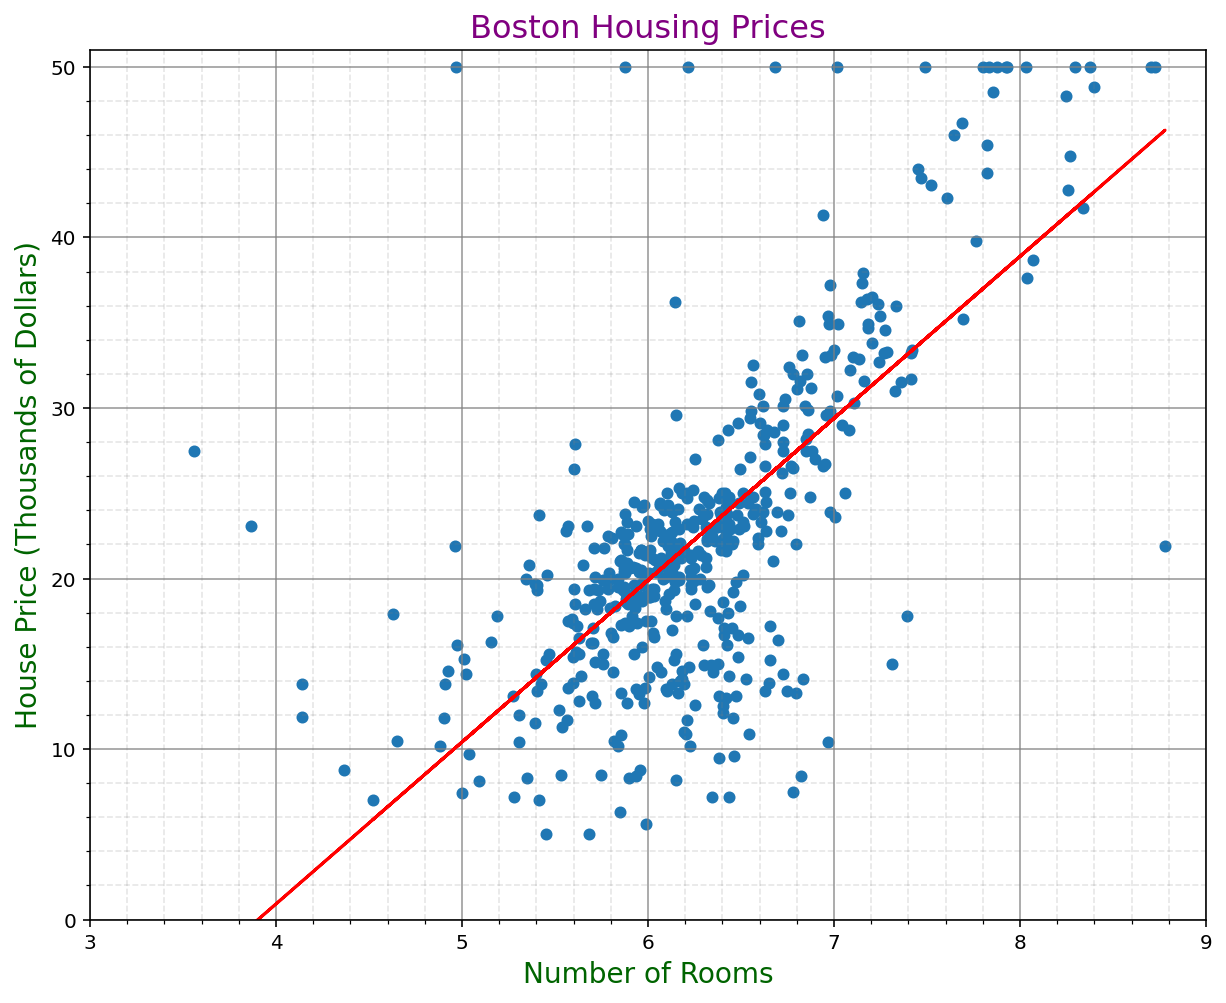

In [ ]:
from sklearn.metrics import mean_absolute_error 

print("Intercept: {:,.3f}".format(lm.intercept_))
print("Coefficient: {:,.3f}".format(lm.coef_[0]))
    
mae = mean_absolute_error(y_test, lm.predict(X_test))
print("MAE = ${:,.2f}".format(1000*mae))

# Plot outputs


fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlim(3, 9)
ax.set_ylim(0, 51)
ax.scatter(x=df['rooms'], y=df['cmedv'],s=25)
ax.plot(X_test, lm.predict(X_test), color='red')
ax.set_xlabel('Number of Rooms',fontsize=14,color='darkgreen')
ax.set_ylabel('House Price (Thousands of Dollars)',fontsize=14,color='darkgreen')
ax.set_title('Boston Housing Prices',fontsize=16,color='purple')
ax.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.2)
ax.minorticks_on()

###<font color='deepskyblue'> Support Vector Regression with Slack Variables</font>

In [ ]:
def svr_results(y_test, X_test, fitted_svr_model):
    
    print("C: {}".format(fitted_svr_model.C))
    print("Epsilon: {}".format(fitted_svr_model.epsilon))
    
    print("Intercept: {:,.3f}".format(fitted_svr_model.intercept_[0]))
    print("Coefficient: {:,.3f}".format(fitted_svr_model.coef_[0]))
    
    mae = mean_absolute_error(y_test, fitted_svr_model.predict(X_test))
    print("MAE = ${:,.2f}".format(1000*mae))
    
    perc_within_eps = 100*np.sum(y_test - fitted_svr_model.predict(X_test) < eps) / len(y_test)
    print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))
    
    # Plot outputs
    fig, ax = plt.subplots(figsize=(10,8))
    ax.set_xlim(3, 9)
    ax.set_ylim(0, 51)
    ax.scatter(x=df['rooms'], y=df['cmedv'],s=25)
    ax.plot(X_test, fitted_svr_model.predict(X_test), color='red')
    ax.plot(X_test, fitted_svr_model.predict(X_test)+eps, color='orange')
    ax.plot(X_test, fitted_svr_model.predict(X_test)-eps, color='orange')
    ax.set_xlabel('Number of Rooms',fontsize=14,color='darkgreen')
    ax.set_ylabel('House Price (Thousands of Dollars)',fontsize=14,color='darkgreen')
    ax.set_title('SVR Predictions',fontsize=16,color='purple')
    ax.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.8)
    ax.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.2)
    ax.minorticks_on()

In [ ]:
eps = 10
svr = LinearSVR(epsilon=eps, C=1, fit_intercept=True)

In [ ]:
svr.fit(X_train, y_train)

LinearSVR(C=1, dual=True, epsilon=10, fit_intercept=True, intercept_scaling=1.0,
          loss='epsilon_insensitive', max_iter=1000, random_state=None,
          tol=0.0001, verbose=0)

C: 1
Epsilon: 10
Intercept: -4.746
Coefficient: 4.449
MAE = $4,547.43
Percentage within Epsilon = 95.28%


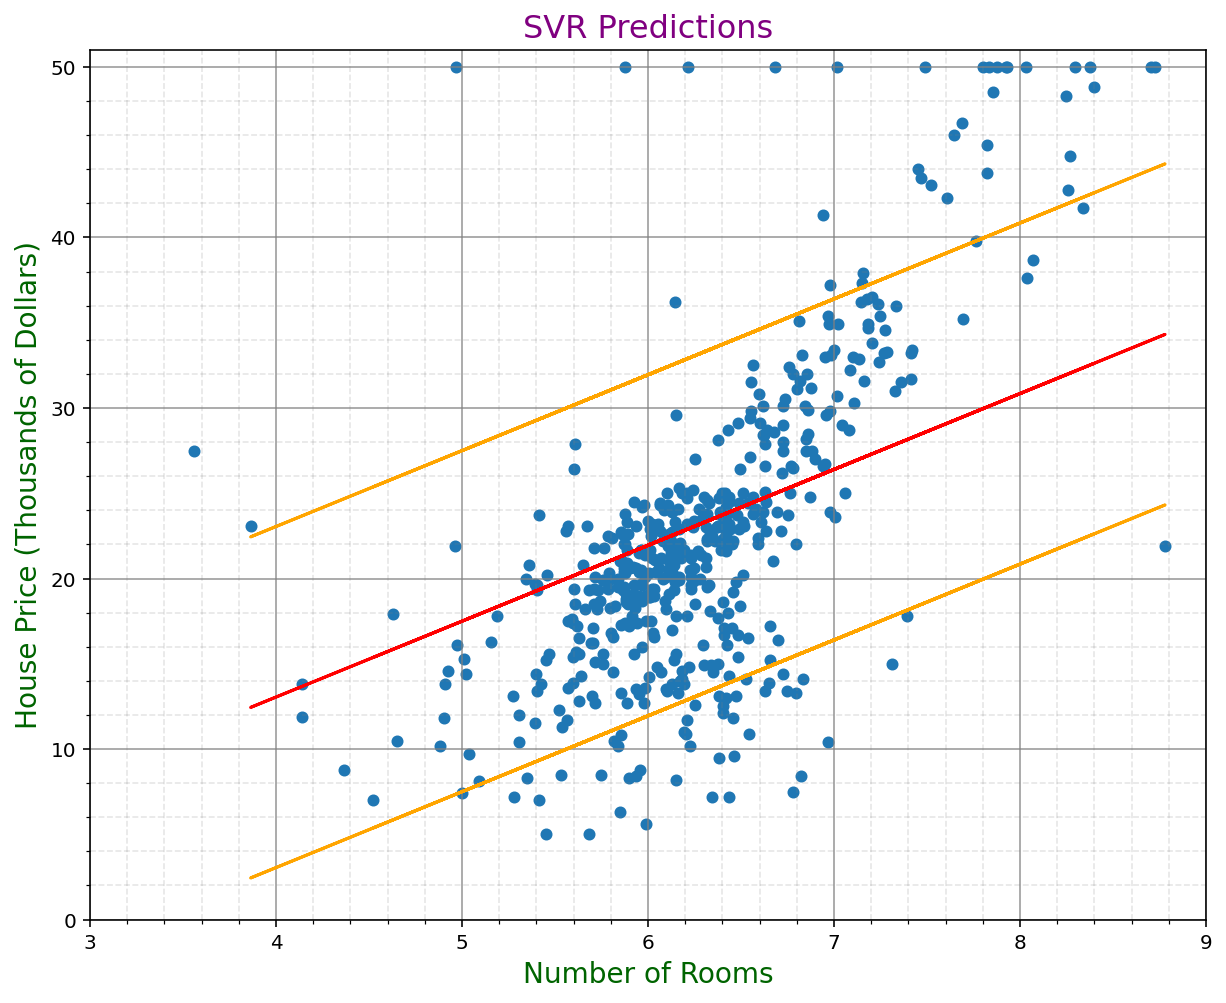

In [ ]:
svr_results(y_test, X_test, svr)

### What happens if we consider a different penalty constant? 

In [ ]:
eps = 5
svr_high_C = LinearSVR(epsilon=eps, C=10, fit_intercept=True)
svr_high_C.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=10, dual=True, epsilon=5, fit_intercept=True, intercept_scaling=1.0,
          loss='epsilon_insensitive', max_iter=1000, random_state=None,
          tol=0.0001, verbose=0)

C: 10
Epsilon: 5
Intercept: -33.877
Coefficient: 8.897
MAE = $4,126.21
Percentage within Epsilon = 85.83%


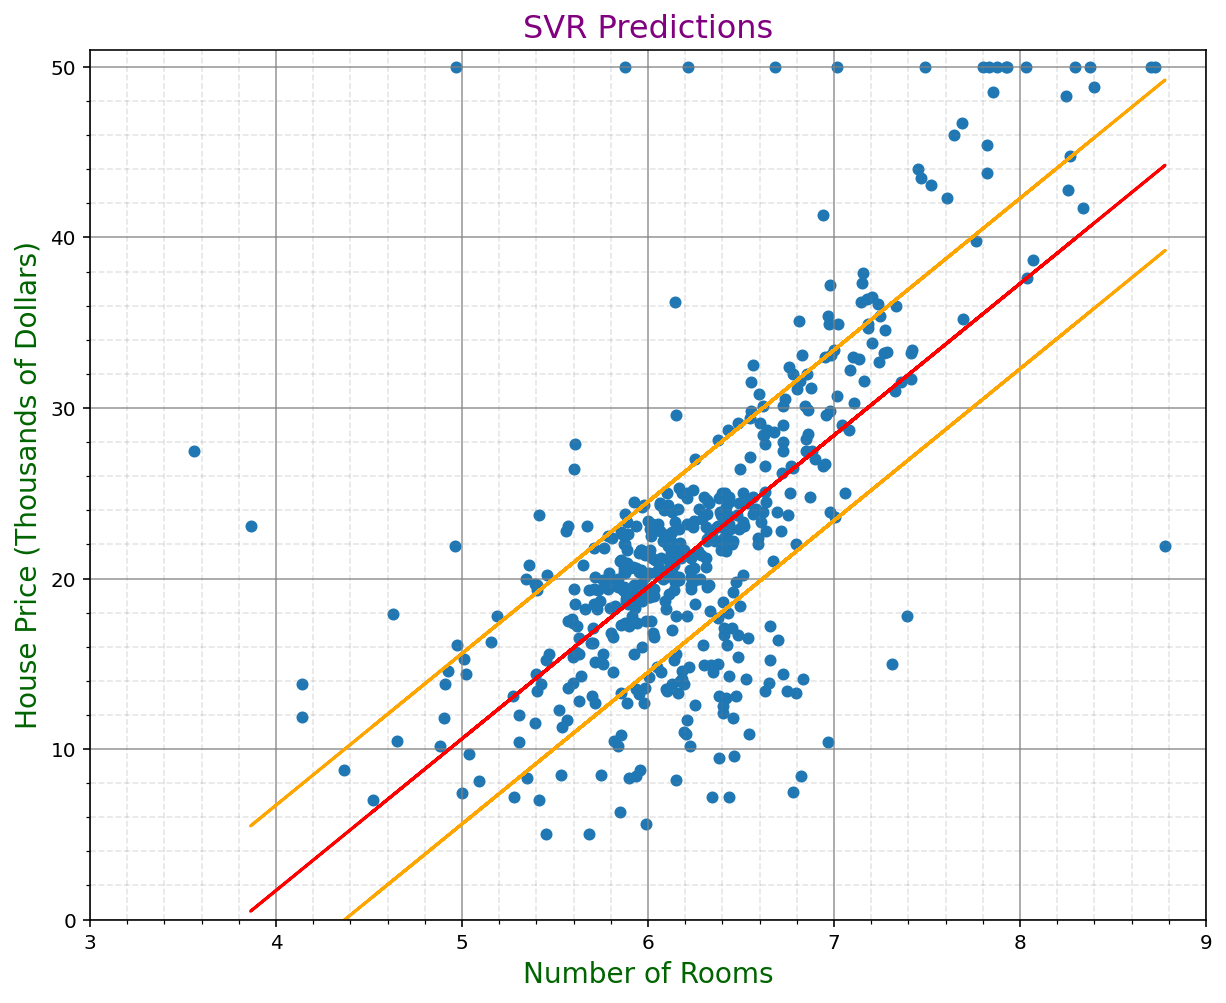

In [ ]:
svr_results(y_test, X_test, svr_high_C)

###<font color='deepskyblue'> Decision Tree Regression </font>

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=3)
Decision_Tree = regr_1.fit(X_train, y_train)


# Predict
X_grid = np.arange(min(X_test), max(X_test), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
y_1 = regr_1.predict(X_grid)

In [ ]:
from sklearn import tree
text_representation = tree.export_text(regr_1)
print(text_representation)

|--- feature_0 <= 6.97
|   |--- feature_0 <= 6.54
|   |   |--- feature_0 <= 5.86
|   |   |   |--- value: [16.10]
|   |   |--- feature_0 >  5.86
|   |   |   |--- value: [19.90]
|   |--- feature_0 >  6.54
|   |   |--- feature_0 <= 6.80
|   |   |   |--- value: [25.20]
|   |   |--- feature_0 >  6.80
|   |   |   |--- value: [28.70]
|--- feature_0 >  6.97
|   |--- feature_0 <= 7.44
|   |   |--- feature_0 <= 7.30
|   |   |   |--- value: [34.52]
|   |   |--- feature_0 >  7.30
|   |   |   |--- value: [28.30]
|   |--- feature_0 >  7.44
|   |   |--- feature_0 <= 7.78
|   |   |   |--- value: [42.57]
|   |   |--- feature_0 >  7.78
|   |   |   |--- value: [46.93]



In [ ]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

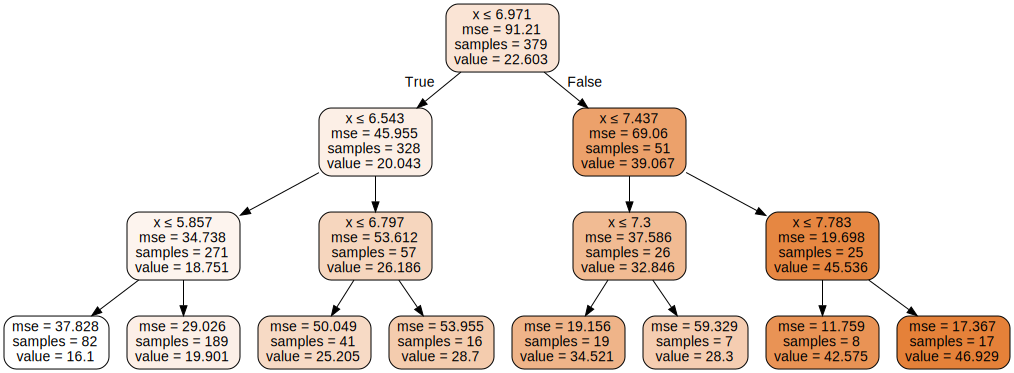

In [ ]:
import graphviz
dot_data = tree.export_graphviz(Decision_Tree, feature_names="x",out_file=None,rounded=True,filled=True,special_characters=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

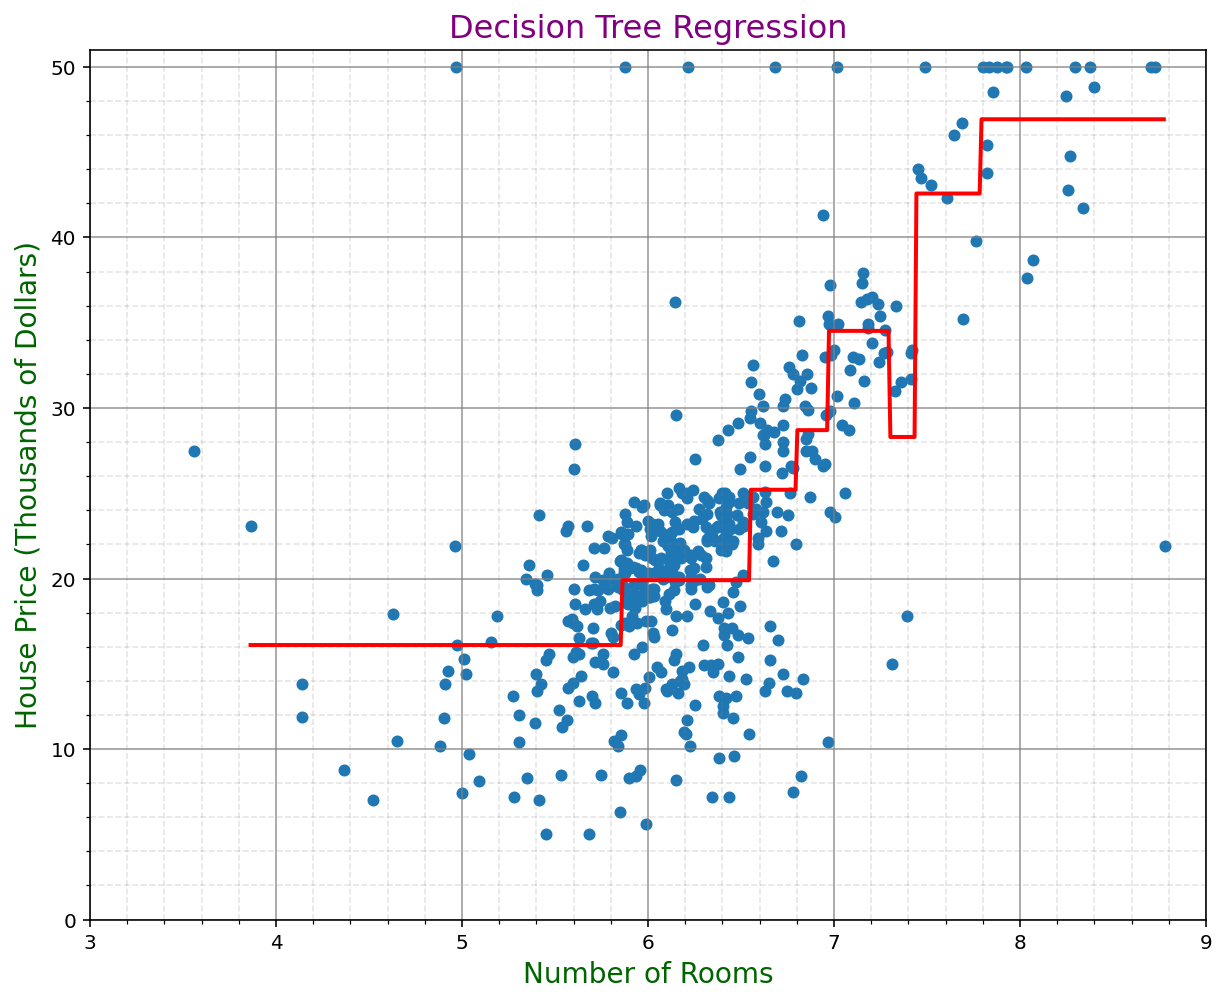

In [ ]:
# Plot outputs
fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlim(3, 9)
ax.set_ylim(0, 51)
ax.scatter(x=df['rooms'], y=df['cmedv'],s=25)
ax.plot(X_grid, y_1, color='red',label="max_depth=2", linewidth=2)
ax.set_xlabel('Number of Rooms',fontsize=14,color='darkgreen')
ax.set_ylabel('House Price (Thousands of Dollars)',fontsize=14,color='darkgreen')
ax.set_title('Decision Tree Regression',fontsize=16,color='purple')
ax.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.2)
ax.minorticks_on()

In [ ]:
# compute MAE
mae = mean_absolute_error(y_test, regr_1.predict(X_test))
print("MAE = ${:,.2f}".format(1000*mae))

MAE = $4,095.50


###<font color='deepskyblue'> Random Forest</font>

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RF_reg = RandomForestRegressor(n_estimators=200,max_depth=3)
model = RF_reg.fit(X_train,y_train.ravel())

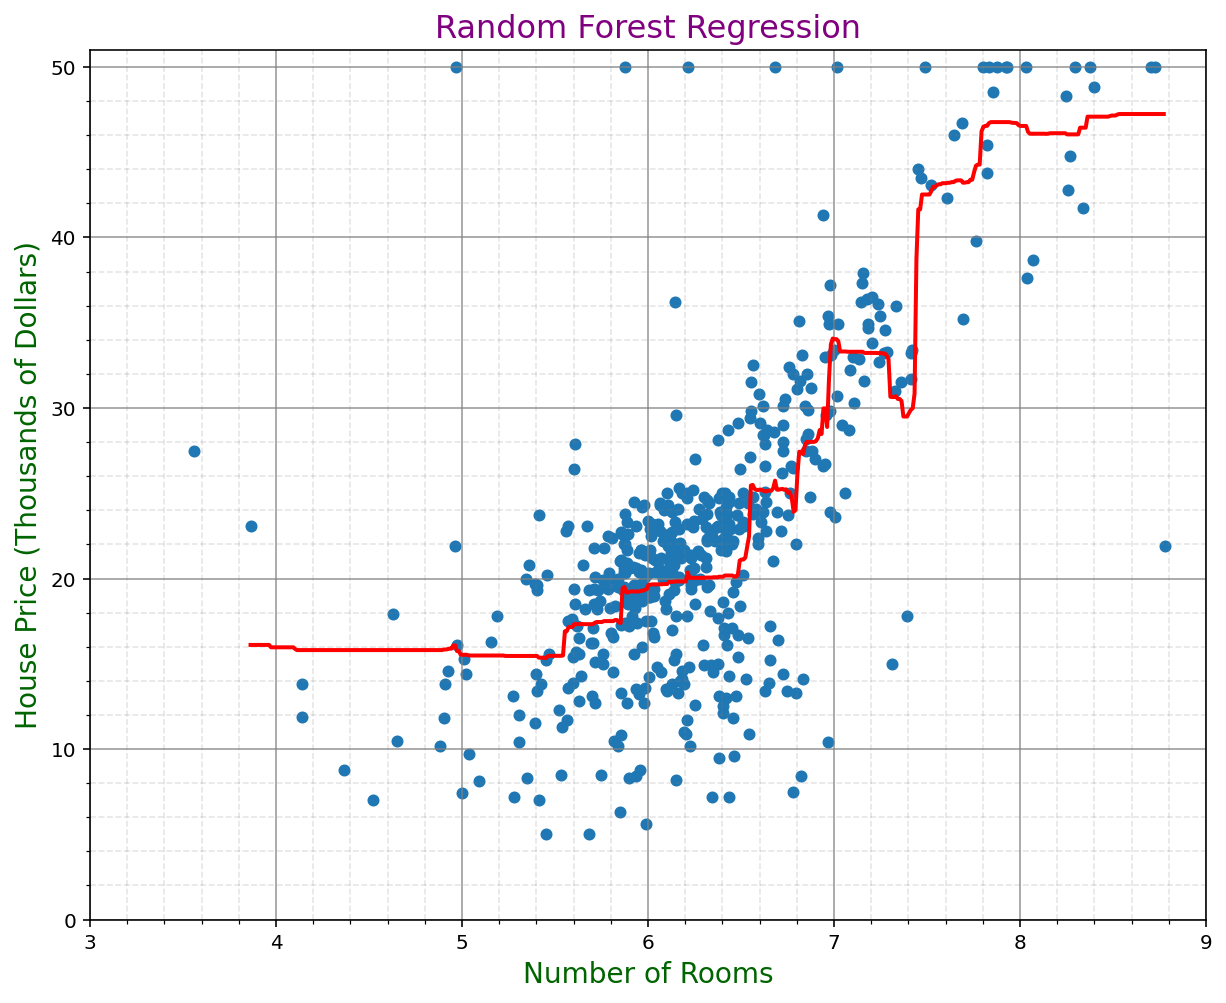

In [ ]:
# Plot outputs
fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlim(3, 9)
ax.set_ylim(0, 51)
ax.scatter(x=df['rooms'], y=df['cmedv'],s=25)
ax.plot(X_grid, model.predict(X_grid), color='red',label="max_depth=2", linewidth=2)
ax.set_xlabel('Number of Rooms',fontsize=14,color='darkgreen')
ax.set_ylabel('House Price (Thousands of Dollars)',fontsize=14,color='darkgreen')
ax.set_title('Random Forest Regression',fontsize=16,color='purple')
ax.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.2)
ax.minorticks_on()

In [ ]:
# compute MAE
mae = mean_absolute_error(y_test, RF_reg.predict(X_test))
print("MAE = ${:,.2f}".format(1000*mae))

MAE = $3,944.26


##XGBoost (Extreme Boosting)

In [ ]:
import xgboost as xgb

In [ ]:
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=500,reg_lambda=10,alpha=10,gamma=100,max_depth=4)
model = xgb_reg.fit(X_train,y_train.ravel())

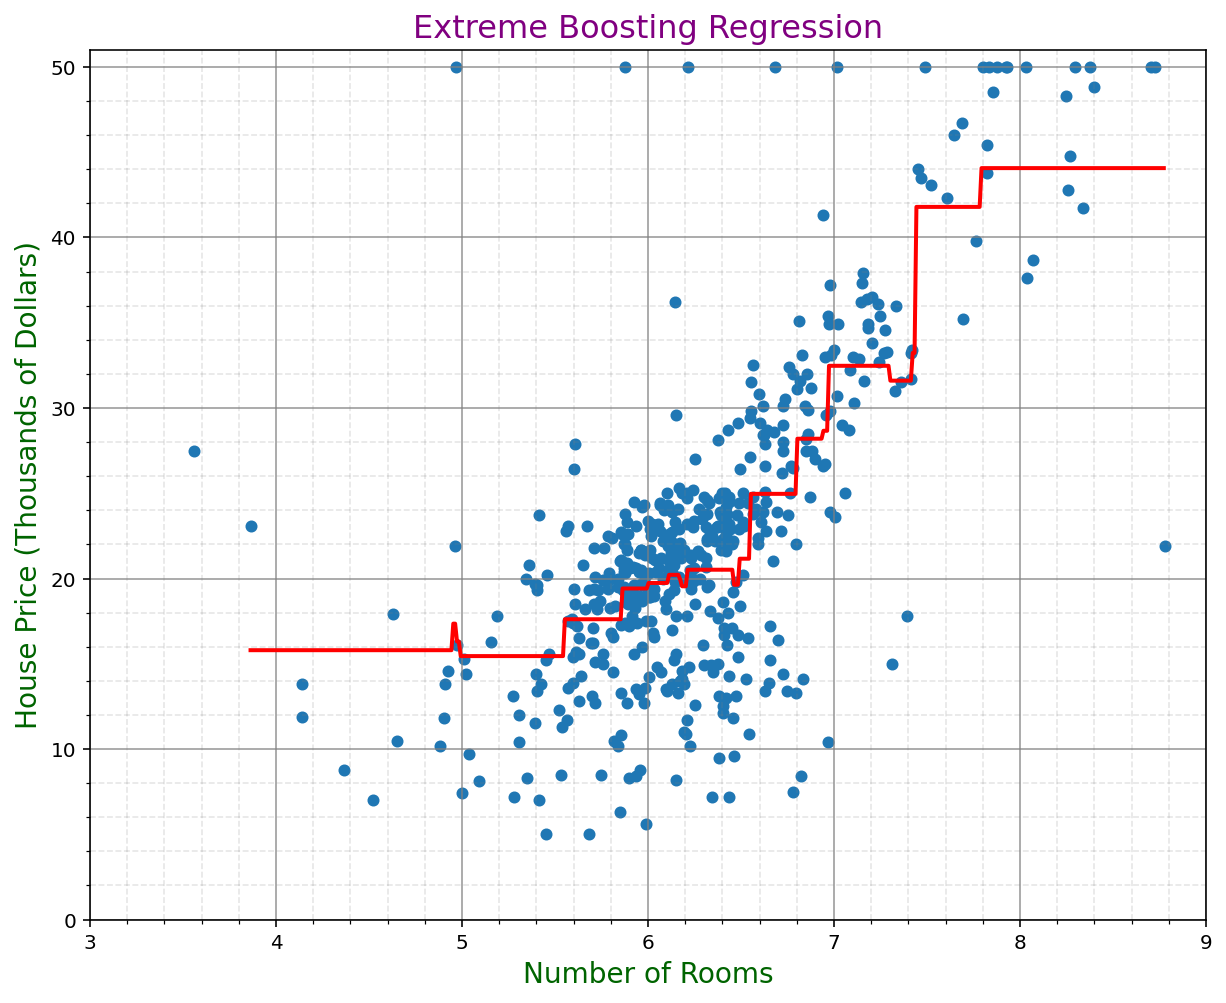

In [ ]:
# Plot outputs
fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlim(3, 9)
ax.set_ylim(0, 51)
ax.scatter(x=df['rooms'], y=df['cmedv'],s=25)
ax.plot(X_grid, model.predict(X_grid), color='red',label="max_depth=2", linewidth=2)
ax.set_xlabel('Number of Rooms',fontsize=14,color='darkgreen')
ax.set_ylabel('House Price (Thousands of Dollars)',fontsize=14,color='darkgreen')
ax.set_title('Extreme Boosting Regression',fontsize=16,color='purple')
ax.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.2)
ax.minorticks_on()

In [ ]:
# compute MAE
mae = mean_absolute_error(y_test, xgb_reg.predict(X_test))
print("MAE = ${:,.2f}".format(1000*mae))

MAE = $3,895.11
